#Step 0 Imports and Reading Data

###Import from Kaggle to Colab
####Only run this once per session

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! kaggle datasets download 'imakash3011/customer-personality-analysis' --force
! unzip /content/customer-personality-analysis.zip

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 48.1MB/s]
Archive:  /content/customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


In [ ]:
# import csv
# with open("marketing_campaign.csv", "r") as f:
#   for line in f:
#     print(line)

# %unload_ext colab_ai

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv("marketing_campaign.csv", sep="\t")
pd.set_option('display.max_columns', 50)  # Display all columns
plt.style.use("ggplot")

# pd.set_option('display.width', 1000)  # Set width for better readability
# pd.set_option('display.expand_frame_repr', False)  # Prevent the DataFrame from wrapping across multiple lines


In [ ]:
print(len(df.query("Marital_Status == 'Widow'")))
print(df["Marital_Status"].value_counts())

77
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [ ]:
#1. Data understanding
print(df.shape)
print(df.head())

(2240, 29)
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds

In [ ]:
print(df.columns)
#I'll add a description of each column here for convenience, based on their description on the Kaggle dataset page [as well as my understanding?]

print(df.describe()) #Count number if the number of entries
#Make this look better

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.50000

In [ ]:
print(df.nunique())

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


In [ ]:
#2. Data Preparation

In [ ]:
#When we look at df.nunique() values:
print(df.nunique())
#Columns Z_CostContact and Z_Revenue only have 1 unique value. Moreover, there values are not described on [] the Kaggle Data Card and having arbitrary meanings. We will drop both of them.

df.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


In [ ]:
# Combine columns
df["Children"] = df["Kidhome"] + df["Teenhome"]
df.drop(columns=["Kidhome", "Teenhome"], inplace=True)

df["Meat_Spending"] = df["MntMeatProducts"] + df["MntFishProducts"]

df["Luxary_Spending"] = df['MntWines'] + df['MntSweetProducts'] + df["MntGoldProds"] #I hypothesize that almost all people buy gold as a luxary opposed to an investment
df.drop(columns=['MntWines','MntSweetProducts', 'MntMeatProducts', 'MntFishProducts', "MntGoldProds"], inplace=True)

# Rename columns
df.rename(columns={
    "MntFruits": "Fruit_Spending",
    "Year_Birth": "Birth_Year",
    "Dt_Customer": "Enrollment_Date"
}, inplace=True)

df.rename(columns={"Response": "AcceptedCmp6"}, inplace=True)
df["Total_Campaigns_Accepted"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"] + df["AcceptedCmp6"]


In [ ]:
print(df["Total_Campaigns_Accepted"].value_counts())

Total_Campaigns_Accepted
0    1631
1     370
2     142
3      51
4      36
5      10
Name: count, dtype: int64


In [ ]:
# #Dropping this category because NumWebPurchases gives enough relevence ?
# df.drop(column=["NumWebVisitsMonth"], inplace=True)

In [ ]:
print(df)
#Make the col names more consistent later

         ID  Birth_Year   Education Marital_Status   Income Enrollment_Date  \
0      5524        1957  Graduation         Single  58138.0      04-09-2012   
1      2174        1954  Graduation         Single  46344.0      08-03-2014   
2      4141        1965  Graduation       Together  71613.0      21-08-2013   
3      6182        1984  Graduation       Together  26646.0      10-02-2014   
4      5324        1981         PhD        Married  58293.0      19-01-2014   
...     ...         ...         ...            ...      ...             ...   
2235  10870        1967  Graduation        Married  61223.0      13-06-2013   
2236   4001        1946         PhD       Together  64014.0      10-06-2014   
2237   7270        1981  Graduation       Divorced  56981.0      25-01-2014   
2238   8235        1956      Master       Together  69245.0      24-01-2014   
2239   9405        1954         PhD        Married  52869.0      15-10-2012   

      Recency  Fruit_Spending  NumDealsPurchases  N

In [ ]:
# print(df.dtypes)
# print((df["Education"].iloc[1]).upper())
#Should be fine for now

In [ ]:
df = df[(df["Income"] != 0) & (df["NumDealsPurchases"] != 0) | (df["NumWebPurchases"] != 0) | (df["NumCatalogPurchases"] != 0) | (df["NumStorePurchases"] != 0)]

In [ ]:
print(df.shape)

(2236, 24)


In [ ]:
#Dealing with Null values
print(df.isnull().sum())

ID                           0
Birth_Year                   0
Education                    0
Marital_Status               0
Income                      24
Enrollment_Date              0
Recency                      0
Fruit_Spending               0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
AcceptedCmp3                 0
AcceptedCmp4                 0
AcceptedCmp5                 0
AcceptedCmp1                 0
AcceptedCmp2                 0
Complain                     0
AcceptedCmp6                 0
Children                     0
Meat_Spending                0
Luxary_Spending              0
Total_Campaigns_Accepted     0
dtype: int64


In [ ]:
#The income column has 24 null values.
#We will drop them right now. Later, we may be able to fill them in using a predictive function or an AI model.
#Feature engineering?

df.dropna(inplace=True)

<ipython-input-24-d9fe7fb2e67b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
#Remove outliers
#Let's use the IQR method to find outliers.
#Let's first find the meaningful columns values. Afterward, if a row has enough  outlier values for each column, then remove rows that have more than an x nummber of outliers in its' columns
#To determine the value x, We will determine the number of "meaningful" value x latera

In [ ]:
df["Enrollment_Date"] = pd.to_datetime(df["Enrollment_Date"], format='%d-%m-%Y')

In [ ]:
#
print(df.columns)

Index(['ID', 'Birth_Year', 'Education', 'Marital_Status', 'Income',
       'Enrollment_Date', 'Recency', 'Fruit_Spending', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'AcceptedCmp6', 'Children',
       'Meat_Spending', 'Luxary_Spending', 'Total_Campaigns_Accepted'],
      dtype='object')


In [ ]:
print(df["Income"].quantile(0.25))

35335.5


In [ ]:
# print(df.shape)


In [ ]:
# df = df[df["Number of Outliers"] < 4].copy()
# df.drop(columns=["Number of Outliers"], inplace=True)

In [ ]:
# print(minimum_datetime)

In [ ]:
# minimum_datetime = int(df["Enrollment_Date"].min().timestamp())
# df["Enrollment_Date"] = df["Enrollment_Date"].apply(lambda x : x.timestamp() - minimum_datetime)

# print(df["Enrollment_Date"].sort_values())

In [ ]:
print(df["AcceptedCmp2"].value_counts())
print(df["AcceptedCmp3"].value_counts())
print(df["AcceptedCmp6"].value_counts())
#1HERE

AcceptedCmp2
0    2182
1      30
Name: count, dtype: int64
AcceptedCmp3
0    2049
1     163
Name: count, dtype: int64
AcceptedCmp6
0    1879
1     333
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())

ID                          0
Birth_Year                  0
Education                   0
Marital_Status              0
Income                      0
Enrollment_Date             0
Recency                     0
Fruit_Spending              0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
AcceptedCmp6                0
Children                    0
Meat_Spending               0
Luxary_Spending             0
Total_Campaigns_Accepted    0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your data
# df = pd.read_csv('your_data.csv')

# Standardize the data
scaler = StandardScaler()
# pd.to_numeric(df["Marital_Status"])
# df["Education"] = df["Education"].astype(int)
# df["Income"] = df["Income"].astype(int)
# df["Enrollment_Date"] = df["Enrollment_Date"].astype(int)
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Fit PCA model
pca = PCA(n_components=0.95)  # Keep 95% of variance
principal_components = pca.fit_transform(df_scaled)

# Calculate the reconstruction error
reconstructed = pca.inverse_transform(principal_components)
reconstruction_error = np.mean((df_scaled - reconstructed) ** 2, axis=1)

# Determine threshold based on error distribution
threshold = np.percentile(reconstruction_error, 95)  # Adjust percentile as needed
df_cleaned = df[reconstruction_error <= threshold]

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)
print(df_cleaned["Income"].describe())

Original DataFrame shape: (2212, 24)
Cleaned DataFrame shape: (2101, 24)
count     2101.000000
mean     50759.227035
std      20081.205466
min       5305.000000
25%      34728.000000
50%      50127.000000
75%      66835.000000
max      98777.000000
Name: Income, dtype: float64


In [ ]:
print(df_cleaned.isnull().sum())

ID                          0
Birth_Year                  0
Education                   0
Marital_Status              0
Income                      0
Enrollment_Date             0
Recency                     0
Fruit_Spending              0
NumDealsPurchases           0
NumWebPurchases             0
NumCatalogPurchases         0
NumStorePurchases           0
NumWebVisitsMonth           0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
AcceptedCmp6                0
Children                    0
Meat_Spending               0
Luxary_Spending             0
Total_Campaigns_Accepted    0
dtype: int64


In [ ]:
# print(len(df_cleaned.query("Complain == 1")))
for col in df_cleaned.columns:
  if(df_cleaned[col].dtype == np.float64):
    df_cleaned[col] = df_cleaned[col].astype(int)
  df[col] = df_cleaned[col].copy()

<ipython-input-37-9f3c4df679cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype(int)


In [ ]:
print(df.shape, df_cleaned.shape)

(2212, 24) (2101, 24)


In [ ]:
print(df.isnull().sum())
print(df_cleaned.isnull().sum())

ID                          111
Birth_Year                  111
Education                   111
Marital_Status              111
Income                      111
Enrollment_Date             111
Recency                     111
Fruit_Spending              111
NumDealsPurchases           111
NumWebPurchases             111
NumCatalogPurchases         111
NumStorePurchases           111
NumWebVisitsMonth           111
AcceptedCmp3                111
AcceptedCmp4                111
AcceptedCmp5                111
AcceptedCmp1                111
AcceptedCmp2                111
Complain                    111
AcceptedCmp6                111
Children                    111
Meat_Spending               111
Luxary_Spending             111
Total_Campaigns_Accepted    111
dtype: int64
ID                          0
Birth_Year                  0
Education                   0
Marital_Status              0
Income                      0
Enrollment_Date             0
Recency                     0
Fruit_Spe

In [ ]:
df.dropna(inplace=True)

In [ ]:
print(df.duplicated().sum())
#No duplicates
df.reset_index(drop=True, inplace=True)

0


In [ ]:
print(df["Total_Campaigns_Accepted"].value_counts())

Total_Campaigns_Accepted
0.0    1549
1.0     349
2.0     132
3.0      36
4.0      28
5.0       7
Name: count, dtype: int64


Text(0, 0.5, 'Income')

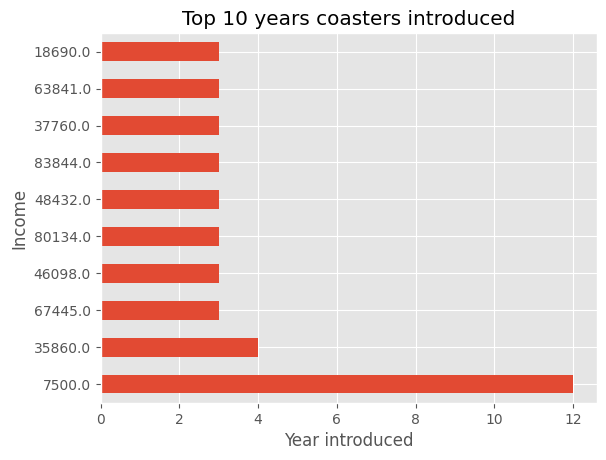

In [ ]:
#3. Feature Understanding
#Univariate analysis

ax = df["Income"].value_counts().head(10).plot(kind="barh", title = "Top 10 years coasters introduced")
ax.set_xlabel("Year introduced")
ax.set_ylabel("Income")
#This doesn't work well because value_counts has WAY too many values. let's try something that can encompass all 1961 unique values of income hahahahaha



In [ ]:
print(df["Income"].max())
#Ok outliers like this need to be removed.

98777.0


Text(0.5, 28.0, 'Year introduced')

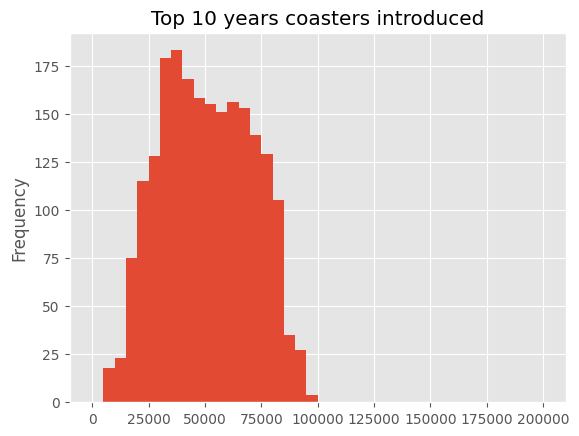

In [ ]:
df["Income"].plot(kind="hist", title = "Top 10 years coasters introduced", bins = 40, range=(0, 200000))
ax.set_xlabel("Year introduced")


In [ ]:
print(df["Income"].max())

98777.0


In [ ]:
print(df.columns)

Index(['ID', 'Birth_Year', 'Education', 'Marital_Status', 'Income',
       'Enrollment_Date', 'Recency', 'Fruit_Spending', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'AcceptedCmp6', 'Children',
       'Meat_Spending', 'Luxary_Spending', 'Total_Campaigns_Accepted'],
      dtype='object')


In [ ]:
# df["Dt_Customer"].plot(kind="hist", bins = 40)
# ax.set_xlabel("Year introduced")


In [ ]:
#I'm gonna have to explain how I found these earlier in the process when I move them. Gonna have to do a value_counts for petty much all columns
df.loc[df["Education"] == "2n Cycle", "Education"] = "Master"
df.loc[df["Education"] == "Basic", "Education"] = "Secondary"


In [ ]:
df["Marital_Status"].value_counts()



Marital_Status
Married     819
Together    547
Single      440
Divorced    215
Widow        74
Alone         3
YOLO          2
Absurd        1
Name: count, dtype: int64

In [ ]:
#The data for this category was collected poorly.

df = df[(df["Marital_Status"] != "Absurd") & (df["Marital_Status"] != "YOLO") & (df["Marital_Status"] != "Secondary")]

#The meaning of "Master" is ambigious, but I'm going to assume it means unmarried man for this EDA.
df.loc[(df["Marital_Status"] == "Alone") | (df["Marital_Status"] == "Master"), "Marital_Status"] = "Single"

df.drop(columns={"ID"}, inplace=True)

<ipython-input-51-9cc03305a057>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns={"ID"}, inplace=True)


In [ ]:
# # numeric_df = df.select_dtypes(include=[np.number])

# # for col1, col2 in zip(numeric_df.columns[::2], numeric_df.columns[1::2]):
# #   df[[col1, col2]].plot(kind="hist", bins = 20, figsize = (3, 3))
# #   plt.show()

# import math

# # numeric_df = df.select_dtypes(include=[np.number]).copy()
# numeric_df = df.copy()
# column_number = 0
# number_of_rows = int(len(numeric_df.columns)/2)
# figure, axis = plt.subplots(number_of_rows+1, 2, figsize=(12, 30))

# for i in range(number_of_rows):
#     axis[i, 0].hist(numeric_df[numeric_df.columns[column_number]], bins = "auto")
#     axis[i, 0].set_title(numeric_df.columns[column_number])
#     axis[i, 0].set_xlabel(numeric_df.columns[column_number])
#     axis[i, 0].set_ylabel("Value")
#     column_number += 1
#     if(column_number < len(numeric_df.columns)):
#       axis[i, 1].hist(numeric_df[numeric_df.columns[column_number]], bins = "auto")
#       axis[i, 1].set_title(numeric_df.columns[column_number])
#       axis[i, 1].set_xlabel(numeric_df.columns[column_number])
#       axis[i, 1].set_ylabel("Value")
#       column_number += 1
#     # plt.locator_params(axis='x', nbins=10)  # Adjust nbins as needed

# #I'm not sure why the number_of_rows counting works -- check later
# axis[number_of_rows, 0].hist(df["Enrollment_Date"], bins = "auto")
# axis[number_of_rows, 0].set_title("Enrollment_Date")
# axis[number_of_rows, 0].set_xlabel("Enrollment_Date")
# axis[number_of_rows, 0].set_ylabel("Value")


# # axis[2, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels

# figure.delaxes(axis[number_of_rows, 1]) #Remove this extra plot

# plt.subplots_adjust(hspace=1.25)  # Adjust the height between subplots
# plt.subplots_adjust(wspace=0.25)  # Adjust the width between subplots

##plt.tight_layout()
# plt.show()


In [ ]:
# print(df.dtypes)

In [ ]:
#Great, now we have a general understanding of our numerical columns using a histogram
#Based on inspection, the columns birth_year, income, recency, Gold_Spending, Children, Meat_Spending, Luxary_Spending, Total_Campaigns_Accepted, Enrollment_Date and the Num of x... columns seem to have more depth to them so we will do a univariate analysis on these columns.
#Maybe even inspect distances?
#Let's explore those categories


In [ ]:
print(len(df.query("Marital_Status == 'Widow'")))

74


## Birth Year

In [ ]:
#Birth_Year
# df["Birth_Year"] = df["Birth_Year"].astype(float)
# print(df.iloc["Birth_Year"][1].dtype)

print(df["Birth_Year"].describe())

count    2098.000000
mean     1968.793136
std        11.994678
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Birth_Year, dtype: float64


In [ ]:
from scipy.stats import kurtosis
#We are using Fisher's definition
print(kurtosis(df["Birth_Year"]))

#Pretty standard. Data is less likely to be skewed and most people are born 1959 and 1977

0.7948999140534281


<Axes: ylabel='Density'>

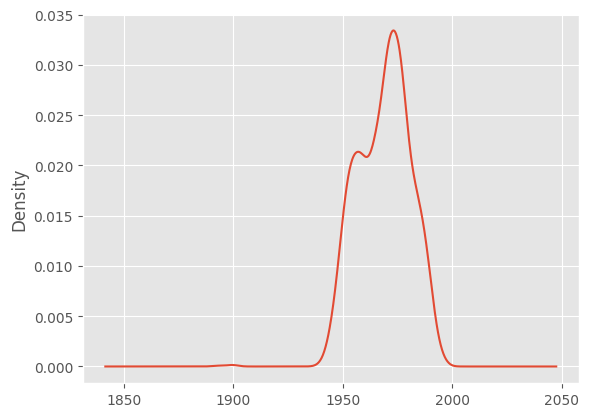

In [ ]:
scaled = df["Birth_Year"]
scaled.plot(kind="kde") #frequency based on bin values (e.g. 20-40)

In [ ]:
print(kurtosis(df["Birth_Year"]))

0.7948999140534281


In [ ]:
#Pretty standard. We can conclude that the distribution is close to normal and that almost all people were born from ~1948-1980

##Education + Marital Status

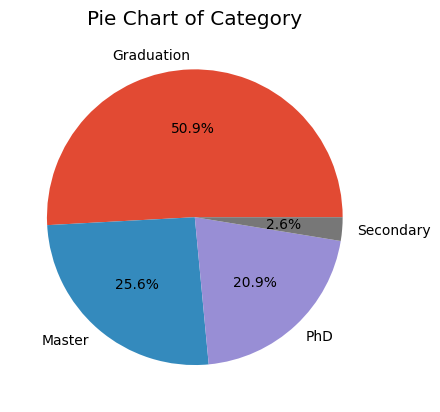

In [ ]:
counts = df["Education"].value_counts()
ax = counts.plot(kind="pie", autopct="%1.1f%%", ylabel="", title="Pie Chart of Category")

plt.show()

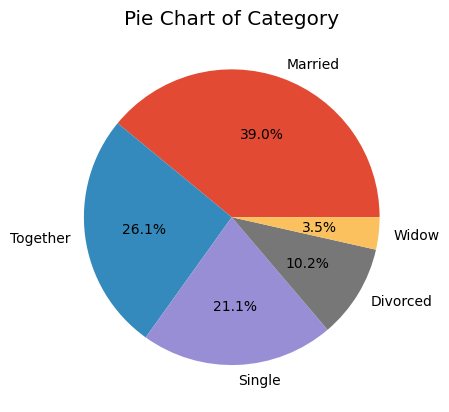

In [ ]:
counts = df["Marital_Status"].value_counts()
ax = counts.plot(kind="pie", autopct="%1.1f%%", ylabel="", title="Pie Chart of Category")

plt.show()

###1/2 people graduated university. Beyond that, 1/4 also a masters and 1/4 have earned up to a PhD
###2/5 are married, 1/4 have a partner (but aren't married), and 1/5 are single. Beyond that, there is a small % of people divorced and widowed.


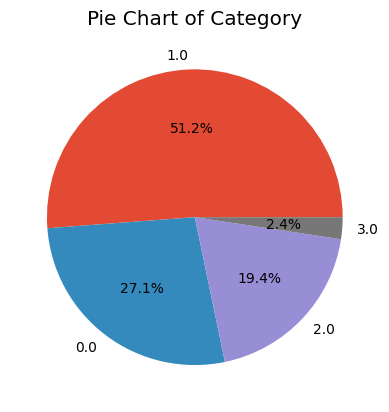

In [ ]:
counts = df["Children"].value_counts()
ax = counts.plot(kind="pie", autopct="%1.1f%%", ylabel="", title="Pie Chart of Category")

plt.show()


###Fraction | Percent of people encompassed including previous/lower numbers
#####1/2 people have no children | 50%
#####1/4 have 0 children | 75%
#####1/5 have 2 children | 95%
#####1/50 have 3 children | 100%

Income

In [ ]:
# ax = df["Income"].plot(kind="kde")
# y_labels = ax.get_yticks()
# ax.set_yticklabels(y_labels)

# plt.xlabel("Income")
# plt.title("Kernel Density Estimate of Income")

# plt.show()

# sns.kdeplot(data=df, x='Income', fill=True, bw_adjust=1, color='red', linestyle='--')
# plt.title('Customized KDE Plot')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.show()
# scaled = df["Income"]
# scaled.plot(kind="kde") #frequency based on bin values (e.g. 20-40)

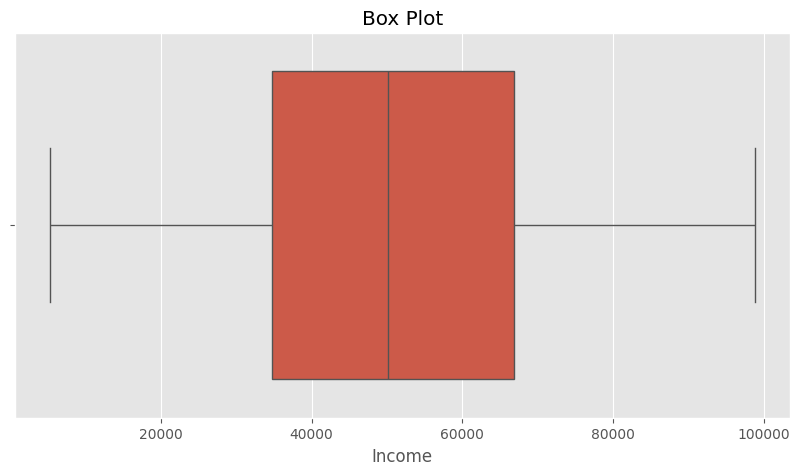

count     2098.000000
mean     50754.425643
std      20092.861666
min       5305.000000
10%      24058.500000
25%      34710.000000
50%      50138.500000
75%      66873.250000
90%      78417.200000
max      98777.000000
Name: Income, dtype: float64

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Income", fliersize=0)
plt.title("Box Plot")
plt.show()
df["Income"].describe(percentiles=[0.1, 0.25, 0.75, 0.9])

In [ ]:
print(kurtosis(df["Income"]))

-0.9174987061451083


##### We can see that our average (median) consumer in the dataset makes $51000, and the majority make in between $24000 and $78000. The distribution is close to normal

##Product Spending

###Fruit Spending

In [ ]:
print(df["Fruit_Spending"].describe(percentiles=[0.1, 0.25, 0.75, 0.9]))

count    2098.000000
mean       25.385605
std        39.004915
min         0.000000
10%         0.000000
25%         1.000000
50%         7.000000
75%        31.000000
90%        81.000000
max       199.000000
Name: Fruit_Spending, dtype: float64


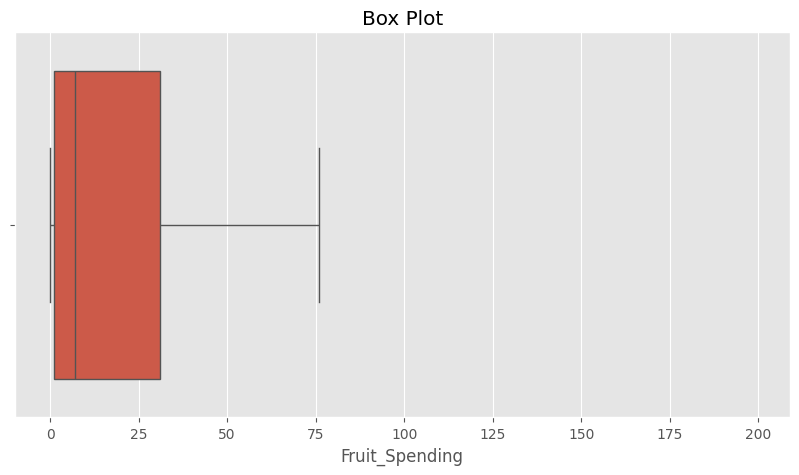

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Fruit_Spending", fliersize=0)
plt.title("Box Plot")
plt.show()

In [ ]:
print(kurtosis(df["Fruit_Spending"]))

4.251315172082409


####Overall, we can see that half of people don't care for fruits and the other half does. The top spenders tend to buy a lot of fruits (top 25%) -- the distribution is even leptokurtic.

###Gold Spending

In [ ]:
# print(df["Gold_Spending"].describe(percentiles=[0.1, 0.25, 0.75, 0.9]))

In [ ]:
# plt.figure(figsize=(10, 5))
# sns.boxplot(data=df, x="Gold_Spending", fliersize=0)
# plt.title("Box Plot")
# plt.show()

In [ ]:
# print(kurtosis(df["Gold_Spending"]))

####The distribution is similar to fruit. While the majority of people spend a relatively low amount on gold with the bottom 50% and 75% spending <$24 and <$54 respectively, the top 25% of spenders spend a disproportionate amount with top 10% spending $111 or more and the max being $249. This is also evident by the curve again being leptokurtic.
####Similar to fruits

count    2098.000000
mean      189.243565
std       238.489939
min         1.000000
10%         9.000000
25%        21.000000
50%        73.000000
75%       287.000000
90%       575.000000
max      1177.000000
Name: Meat_Spending, dtype: float64


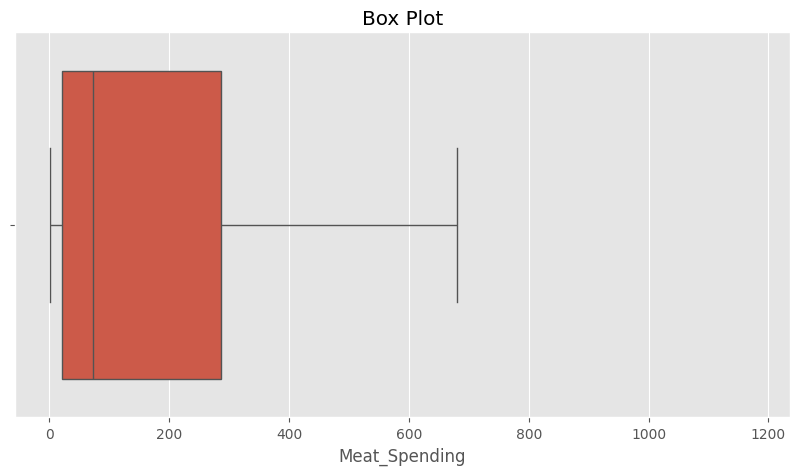

In [ ]:
print(df["Meat_Spending"].describe(percentiles=[0.1, 0.25, 0.75, 0.9]))
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Meat_Spending", fliersize=0)
plt.title("Box Plot")
plt.show()

In [ ]:
print(kurtosis(df["Meat_Spending"]))

1.6425684101516822


<Axes: ylabel='Density'>

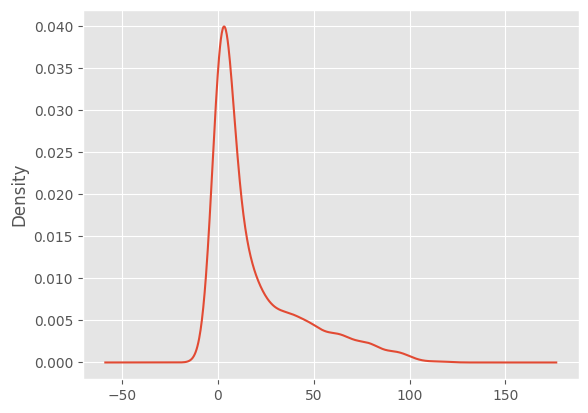

In [ ]:
scaled = df["Meat_Spending"]/10
scaled.plot(kind="kde") #frequency based on bin values (e.g. 20-40)

###Meat_Spending
#####The distribution of meat spending is more evenly distributed than the previous spendings of fruit and gold. This may seem like a strange conclusion to come to given the graphs above and the very high amount spend by top spenders (with the top 10% spending from $576-$1177). However, the important thing to note is that the bottom 25% and 50% of spenders spend up to $21 and $73 respectively, a median of $73 compared to previous medians of $7 and $23 for gold and fruit respectively. We can also see that the descriptive statistics that the distribution is quite spread out (10th-90th percentile ranging from $9 to $576)

count    2098.000000
mean      355.412774
std       364.692731
min         3.000000
10%        18.000000
25%        40.000000
50%       220.000000
75%       582.250000
90%       928.000000
max      1667.000000
Name: Luxary_Spending, dtype: float64


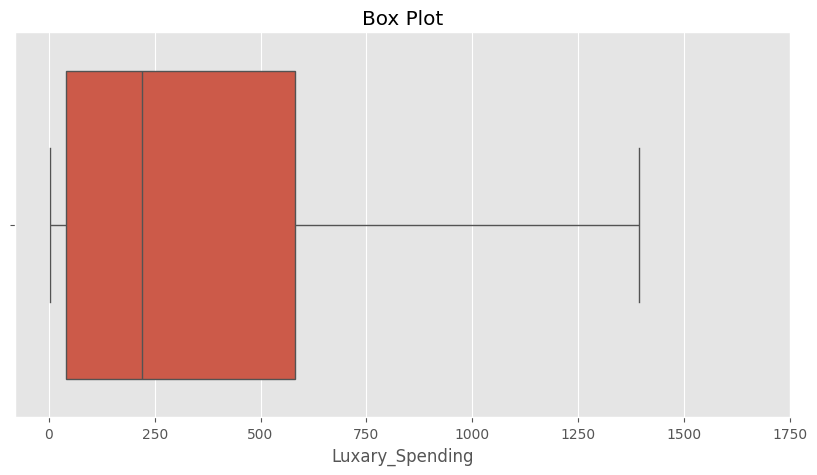

0.1627929015473737


In [ ]:
print(df["Luxary_Spending"].describe(percentiles=[0.1, 0.25, 0.75, 0.9]))
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Luxary_Spending", fliersize=0)
plt.title("Box Plot")
plt.show()
print(kurtosis(df["Luxary_Spending"]))

#####The same thing happened with the distribution of luxary spending as what happened with meat spending, with the median being $184 spend on average individually on luxary products. We can also see that the descriptive statistics that the distribution is quite spread out (10th-90th percentile ranging from $11 to $837)
#####**Overall we can conclude here that each consumer in our dataset spends a decent amount a year on luxary products, with this result having a large range**

#####For the other columns that concerned directly with purchases and marketing, exploring their distributions is sufficiently done in our histogram and we are concerned with their correlation with their feature relations. Let's move onto doing that. We can finally see a correlation heatmap for our variables!

#**Step 4: Feature Relationships**

##Correlation Heatmap

#####For our heatmap, let's quickly convert our string dataframes so we'll be able to see their correlations with numerical columns

In [ ]:
df.columns

Index(['Birth_Year', 'Education', 'Marital_Status', 'Income',
       'Enrollment_Date', 'Recency', 'Fruit_Spending', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'AcceptedCmp6', 'Children',
       'Meat_Spending', 'Luxary_Spending', 'Total_Campaigns_Accepted'],
      dtype='object')

In [ ]:
print(df["Education"].unique())
print(df["Marital_Status"].unique()) # -- maybe I should have done this before?
# Enrollment_Date -- maybe I should have done this before?

['Graduation' 'PhD' 'Master' 'Secondary']
['Single' 'Together' 'Married' 'Divorced' 'Widow']


#####We'll use label encoding for Education since it can be ranked and one-hot encoding for Marital Status since it cannot be ranked

In [ ]:
custom_education_label_mapping = {
  "Secondary": 0,
  "Graduation": 1,
  "Master": 2,
  "PhD": 3
}

df["Education"] = df["Education"].map(custom_education_label_mapping).astype(float)

In [ ]:
custom_marital_status_label_mapping = {
  "Single": 0,
  "Widow": 0,
  "Divorced": 0,
  "Together": 1,
  "Married": 1
}

df["Marital_Status"] = df["Marital_Status"].map(custom_marital_status_label_mapping).astype(float)

In [ ]:
df["Enrollment_Date"] = df["Enrollment_Date"].astype(int) // 10**9 // 86400
df["Enrollment_Date"] = df["Enrollment_Date"] - 15551
df["Enrollment_Date"] = df["Enrollment_Date"].astype(float)

In [ ]:
df.drop(columns=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp6", "Recency", "Complain", "NumWebVisitsMonth", "NumDealsPurchases"], inplace=True)

In [ ]:
print(df.columns)

Index(['Birth_Year', 'Education', 'Marital_Status', 'Income',
       'Enrollment_Date', 'Fruit_Spending', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'Children', 'Meat_Spending', 'Luxary_Spending',
       'Total_Campaigns_Accepted'],
      dtype='object')


In [ ]:
# df_corr = df[[col for col in df.columns]].corr()

# plt.figure(figsize=(102, 100))
# sns.heatmap(df_corr, annot=True)
# plt.show()

#####What a huge graph! You're welcome to look at the correlations. I will refer back to this heatmap in Step #5 when we ask some individual questions about the data.

Here is the summary of correlations that may have not been expected:


---



1.   Income and children had a negative 0.34 correlation
2.   Fruit purchasing was positively correlated with company purchases

We can also see that some columns that may have been expected to have significant correlations only had negligible/insigificant correlations, such as enrollment date, [the outside columns]







#####Let's plot all of the correlations that stand out:![data.png](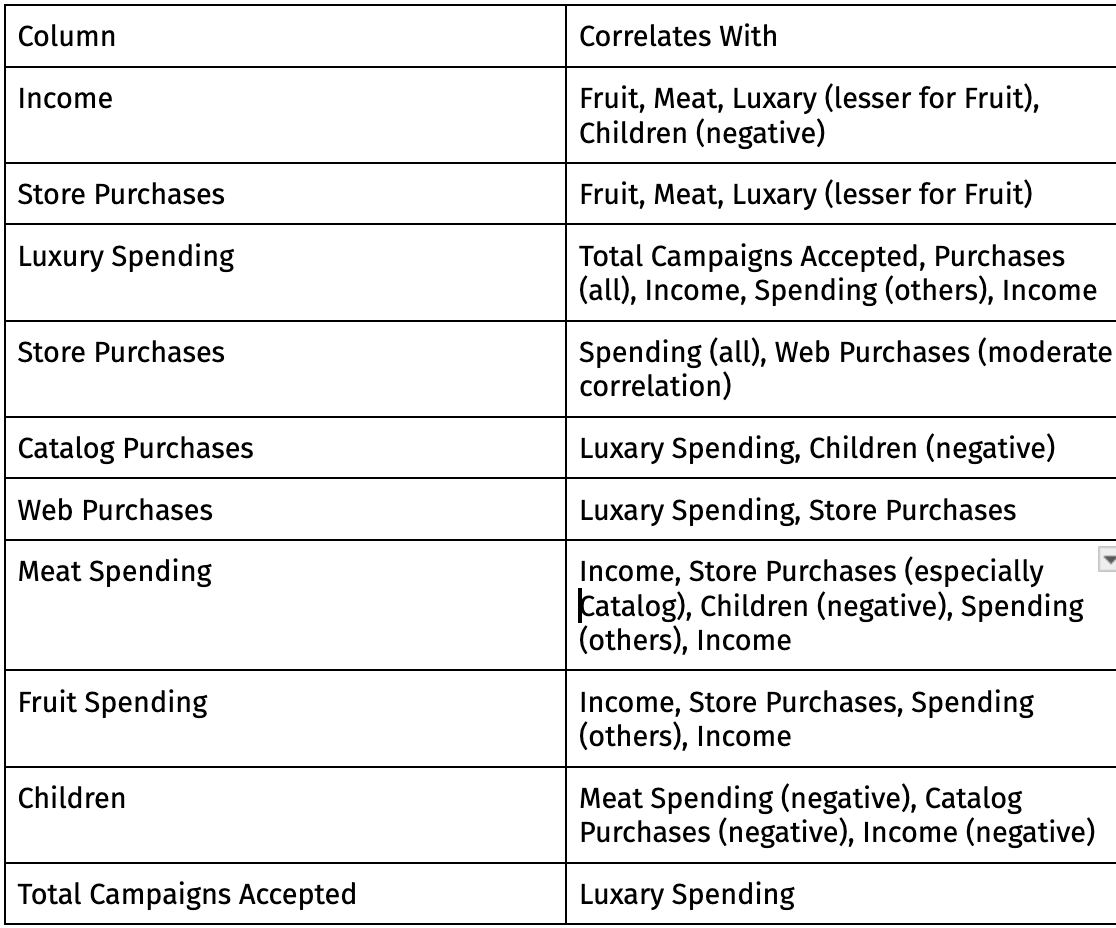![9AJJA.png](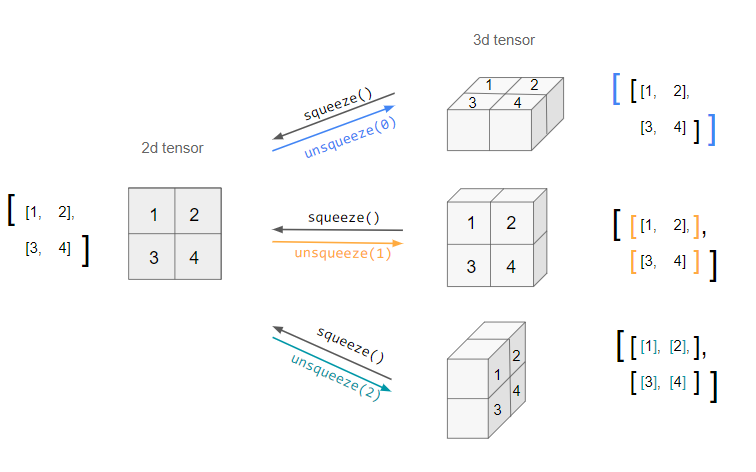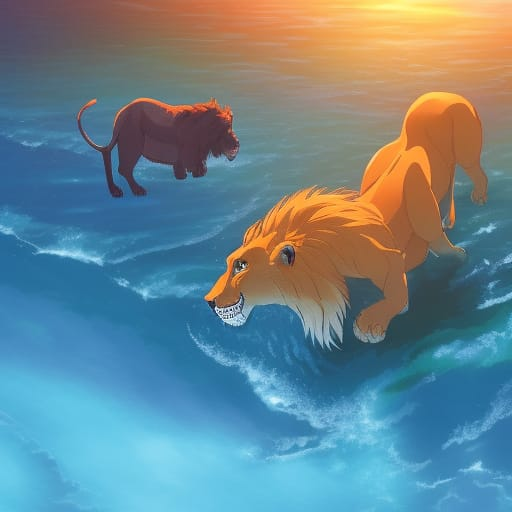))

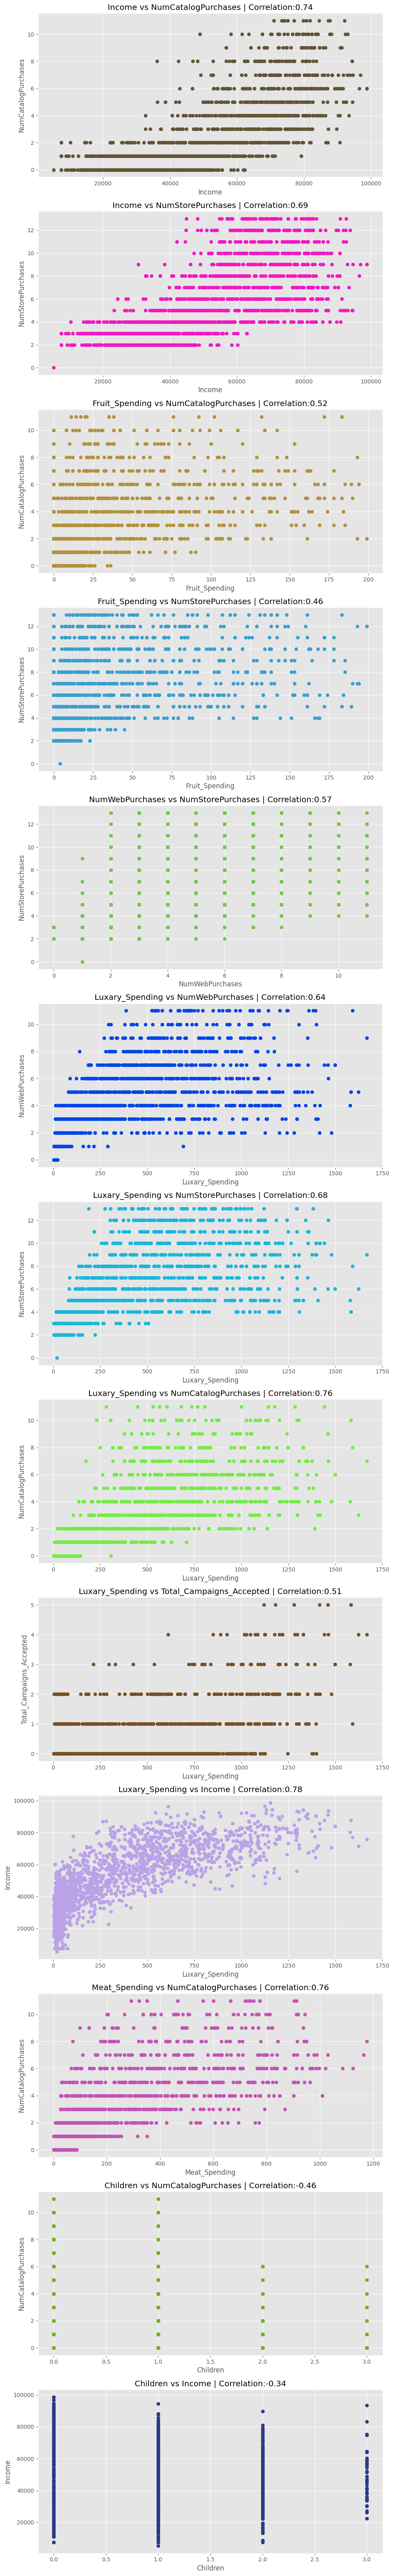

In [ ]:
import math
single_variables = ["Income", "Fruit_Spending", "NumWebPurchases", "Luxary_Spending", "Meat_Spending", "Children", ]
multiple_variable_combinations = [["NumCatalogPurchases", "NumStorePurchases"], ["NumCatalogPurchases", "NumStorePurchases"], ["NumStorePurchases"], ["NumWebPurchases", "NumStorePurchases", "NumCatalogPurchases", "Total_Campaigns_Accepted", "Income"], ["NumCatalogPurchases"], ["NumCatalogPurchases", "Income"]]

number_of_rows = sum(len(row) for row in multiple_variable_combinations)
figure, axis = plt.subplots(number_of_rows, 1, figsize=(10, 5 * number_of_rows))

number = 0
for i, s_v in enumerate(single_variables):
  for j, m_v in enumerate(multiple_variable_combinations[i]):
    axis[number].scatter(df[s_v], df[m_v], color=np.random.rand(3,)) #fix later
    axis[number].set_xlabel(s_v)
    axis[number].set_ylabel(m_v)
    axis[number].set_title(f"{s_v} vs {m_v} | Correlation:{round(df[m_v].corr(df[s_v]), 2)}")
    number += 1

plt.tight_layout()
plt.show()


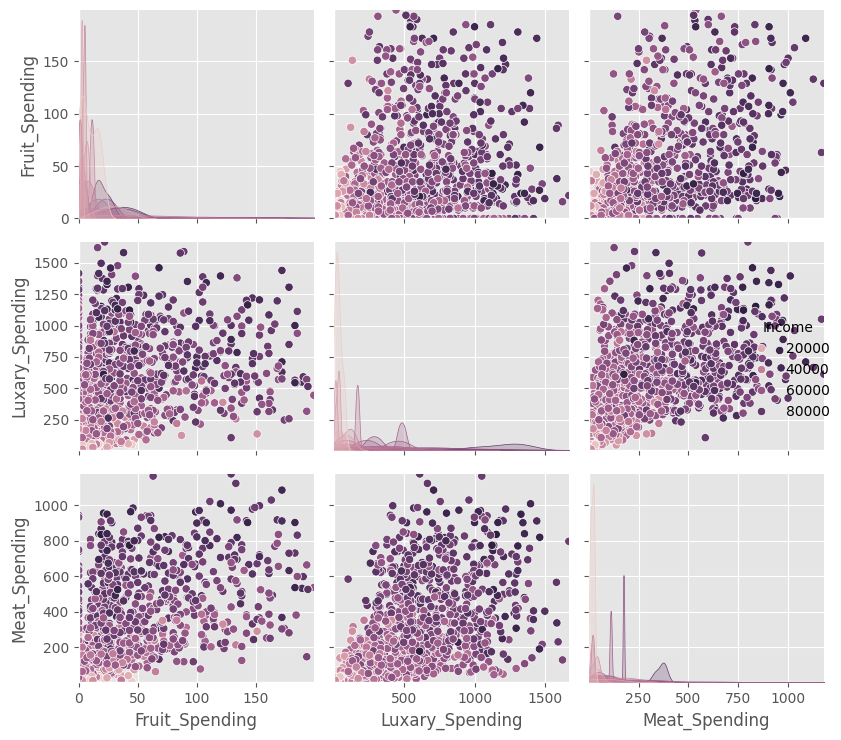

In [ ]:
pairplot = sns.pairplot(df, vars=["Fruit_Spending", "Luxary_Spending", "Meat_Spending"], hue="Income")

for axis in pairplot.axes.flatten():
  x_label = axis.get_xlabel()
  if x_label in df.columns:
    axis.set_xlim(df[x_label].min(), df[x_label].max())

  y_label = axis.get_ylabel()
  if y_label in df.columns: #not 100% sure how this works
    axis.set_ylim(df[y_label].min(), df[y_label].max())

plt.tight_layout()
plt.show()

In [ ]:
columns_to_correlate = ["Fruit_Spending", "Luxary_Spending", "Meat_Spending", "Income"]
df[columns_to_correlate].corr()

,Fruit_Spending,Luxary_Spending,Meat_Spending,Income
Fruit_Spending,1.000000,0.474444,0.662756,0.542700
Luxary_Spending,0.474444,1.000000,0.691053,0.784328
Meat_Spending,0.662756,0.691053,1.000000,0.746093
Income,0.542700,0.784328,0.746093,1.000000


#####Great. We can see a few things visually based on the scatter plots:

Change to correlation between instead of one causes the other. Simplify it too way too much
1. The strongest correlation between any 2 different columns is between luxary spending and income. This should come at no surprise. Furthermore, there is a very strong similarity in the correlation between luxary spenders and the NumWebPurchases and NumStorePurchases columns and income and those same purchasing columns. However, upon another inspection of the correlation heatmap, luxary spenders have a slightly stronger correlation NumWebPurchases compared to Income and NumWebPurchases.

2. Correlation between [higher incomes and who buy more fruits and luxary products (lesser so for fruit spenders)] | spend more money at our store.

3.   There is a *moderate* correlation between people who come in our store and who shop on our website. The key word here is moderate.
4. The people who have accepted the largest amount of our campaigns are luxary product spenders (moderate correlation). Given the almost identical correlation between (meat and luxary spenders) with income but the greater correlation between total campaigns accepted and luxary spending, this implies that luxary spenders lesser impulse control also extends to our campaigns.
5. Meat spenders tend to buy a lot from our catalogs. On the other hand, people with children have a low negative correlation with buying things from our catalogs. Meat spending and having children is also negatively correlated.

largest indication


In [ ]:
print("\n".join(f"Average income for {round(child_count, 0)} children: {df.query(f'Children == {child_count}')['Income'].median()}" for child_count in df['Children'].value_counts().sort_index().index))


Average income for 0.0 children: 71648.0
Average income for 1.0 children: 46327.0
Average income for 2.0 children: 43800.0
Average income for 3.0 children: 44277.0


6. If we look at Children vs Income, we can see that there is a pretty clear negative correlation between children and income. The interesting thing is that the difference between the median between 0 children and 1 child is 25000, implying that ...
7. The correlation between the different types of spending is clearly high. This is mainly due to income, although there may be a some exceptions, especially with fruit spending.

In [ ]:
(df.values<0).any()

#5. Answering Questions
##### This part should be quite easy, given that the analysis is already done
##### So let's ask some interesting questions about our data.

##### 1. What customers are most likely to spend money on Fruit, Meat, and Luxary products? What customers are most likely to buy our products/accept our campaigns?

#####Here is a nice summary

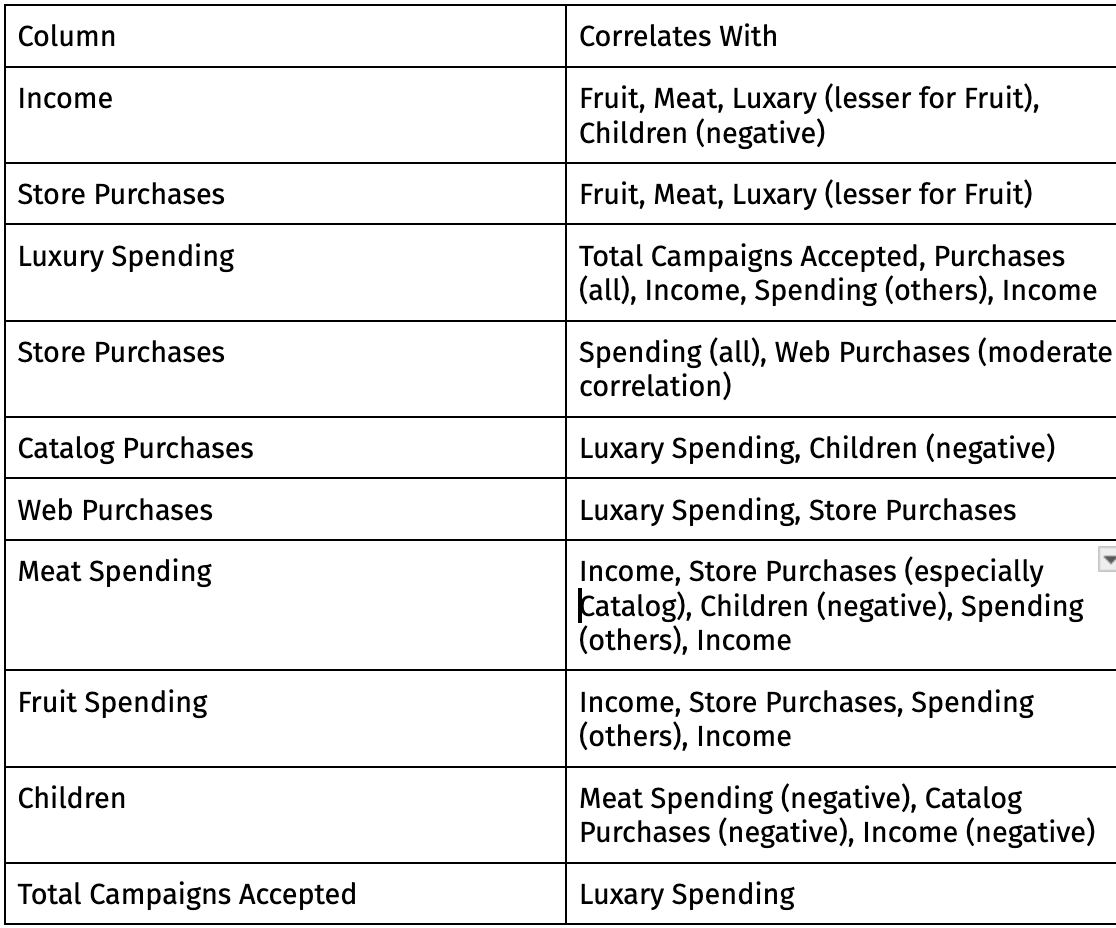

### 2. What is our store?
##### One very interesting thing that is unclear in our data is what type of store all of our marketing and purchase data belongs to! What could our store possible be?
##### After a long understanding of our dataset, we can conclude that the people who buy from our store and are receptive to our marketing campaigns have a large income, tend to buy lots of luxary products, have less children, and also have (lesser) correlations with fruit spending and meat spending.

In [104]:
df["Total_Purchases"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
top = df[(df["Total_Campaigns_Accepted"] >= df["Total_Campaigns_Accepted"].quantile(0.75)) & (df["Total_Purchases"] >= df["Total_Purchases"].quantile(0.75))]
print(top.mean())

Birth_Year                   1966.631148
Education                       1.778689
Marital_Status                  0.635246
Income                      73081.299180
Enrollment_Date               328.143443
Fruit_Spending                 54.442623
NumDealsPurchases               1.872951
NumWebPurchases                 6.557377
NumCatalogPurchases             6.094262
NumStorePurchases               8.741803
Children                        0.356557
Meat_Spending                 477.176230
Luxary_Spending               898.245902
Total_Campaigns_Accepted        1.762295
Total_Purchases                21.393443
dtype: float64


#####This reaffirms what we discovered. We can conclude that the business in the dataset is likely a high/end luxary business. It could be in...

Fashion, jewlery, cars, hotels, dining, wellness, skincare, travel, a private club, art, technology, etc.



###Thanks for browsing my EDA! I appreciate your time 🙂
